<a href="https://colab.research.google.com/github/Shrey1410/minor_proj/blob/main/Minor_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d mohitsingh1804/plantvillage

Dataset URL: https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
License(s): GPL-2.0
100% 818M/818M [00:09<00:00, 103MB/s] 
100% 818M/818M [00:09<00:00, 87.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/PlantVillage/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/PlantVillage/val",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 43444 files belonging to 38 classes.
Found 10861 files belonging to 38 classes.


In [18]:
def process(image , label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [19]:
    model = Sequential()
    model.add(Conv2D(32,(3,3),strides = 1,padding = 'same',input_shape = (256,256,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(64, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(256, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(512, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dense(38, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2048)                │      67,110,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 38)                  │          77,862 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,314,406 (264.41 MB)

 Trainable params: 69,314,406 (264.41 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,
                    epochs=5,
                    validation_data=val_ds
                    )

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 188s 135ms/step - accuracy: 0.4424 - loss: 2.0407 - val_accuracy: 0.8292 - val_loss: 0.5172
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 180s 120ms/step - accuracy: 0.8700 - loss: 0.4069 - val_accuracy: 0.8925 - val_loss: 0.3212
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 202s 120ms/step - accuracy: 0.9243 - loss: 0.2215 - val_accuracy: 0.9004 - val_loss: 0.3296
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 164s 121ms/step - accuracy: 0.9547 - loss: 0.1369 - val_accuracy: 0.9166 - val_loss: 0.2853
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 164s 121ms/step - accuracy: 0.9639 - loss: 0.1060 - val_accuracy: 0.9071 - val_loss: 0.3717


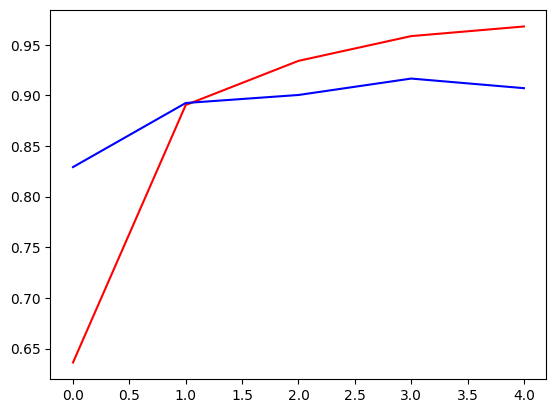

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

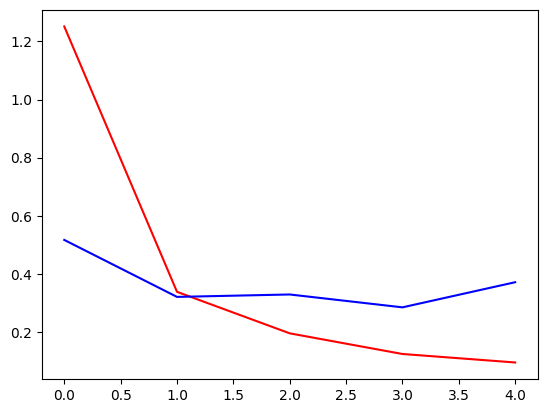

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')